## 1. Data loading and inspection

TO DOS

Be more clear on the process, explain overview and final results

Solve outliers issues

Check if the missing values of org fert matches the 0 cultivated area

In [4]:
# import libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats

# for static plots
%matplotlib inline

### loading and inspection of main dataset

The first step in the process is to load and quckly inspect the main dataset

In [5]:
# read main dataset
data = pd.read_csv('../Data/main.csv')
# Preview
data.head(10)

HHID  land_total_acres  land_cultivated_acres  maize_harvest_qty  \
0   409              2.50                   0.50                1.5   
1   398              2.00                   1.00               15.0   
2   397              1.50                   1.25                2.0   
3   395              3.00                   2.00               28.0   
4   389              0.25                   0.25               32.0   
5   382              1.50                   1.50                3.0   
6   370              1.00                   0.50                2.0   
7   369              1.00                   0.50                5.0   
8   361             10.00                   8.00                7.0   
9   358              7.00                   5.50               23.0   

  maize_unit livestock_owned                        livestock_types usedOM  \
0  90 Kg bag             Yes         Dairy cows Goats Poultry Sheep    Yes   
1  90 Kg bag             Yes                       Dairy cows Goats    Yes   
2  90 Kg bag             Yes                                Poultry     No   
3  90 Kg bag             Yes                 Dairy cows Goats Sheep    Yes   
4  90 Kg bag             Yes                      Calves Dairy cows     No   
5  90 Kg bag             Yes                       Dairy cows Goats     No   
6  90 Kg bag             Yes  Dairy cows Trained oxen for ploughing    Yes   
7  90 Kg bag             Yes                                Poultry    Yes   
8  90 Kg bag             Yes                             Dairy cows     No   
9  90 Kg bag             Yes                       Dairy cows Goats    Yes   

  climate_info_received hh_head_gender  hh_size_total    hh_head_education  \
0                   Yes           Male             10              Primary   
1                   Yes           Male              8            Secondary   
2                   Yes           Male              3              Diploma   
3                   Yes           Male              5          Certificate   
4                   Yes           Male              5          Certificate   
5                    No           Male              4            Secondary   
6                   Yes           Male              6  Postgraduate degree   
7                   Yes           Male              6            Secondary   
8                   Yes           Male              7          Certificate   
9                   Yes           Male              9          Certificate   

   latitude  longitude  
0 -0.152069  34.957133  
1 -0.065602  34.603184  
2 -0.262380  34.856136  
3  0.093717  34.577614  
4  0.072590  34.685747  
5  0.142677  34.825974  
6 -0.358320  34.708902  
7  0.062224  34.622627  
8 -0.267780  34.699328  
9 -0.203124  34.782004

The preview of the dataset allow us to see that we are dealing with a wide dataframe, that has data related to farm size, cultivated area, production of maize, livestock ownership, livestock types, usedOM, climate information received by the farmer, head of household gender, household size, education level of the household head, and farm location.

### Insights: 

- The dataset includes a field with household ids useful to identify and correctly identify each datapoint.
- Some variable names have capital letters and small letters
- The dataset includes numerical data and categorical data
- The variable usedOM is not referenced in the data dictionary an assuption is that it is refering to the use of organic matter (Compost, manure, etc)

The second step in the inspection is to show more generalized information on the shape of the dataset (number of variables, number of datapoints), missing values, and data types for each variable.

In [6]:
#explore general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HHID                   100 non-null    int64  
 1   land_total_acres       100 non-null    float64
 2   land_cultivated_acres  100 non-null    float64
 3   maize_harvest_qty      100 non-null    float64
 4   maize_unit             100 non-null    object 
 5   livestock_owned        100 non-null    object 
 6   livestock_types        88 non-null     object 
 7   usedOM                 100 non-null    object 
 8   climate_info_received  100 non-null    object 
 9   hh_head_gender         100 non-null    object 
 10  hh_size_total          100 non-null    int64  
 11  hh_head_education      100 non-null    object 
 12  latitude               100 non-null    float64
 13  longitude              100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### Insights:

- The dataset has 14 variables (columns) and 100 datapoints (rows)
- The variable livestock_types has 14 missing values and requires further inspection to understand the nature of the missing records
- There are 5 float data type variables
- There are 2 integer data type variables
- There are 7 object (text, boolean, levels, categories) data type variables

## 2. Descriptive statistics

The following step in the process is to produce a more detailed and thorough statistical profile of the data, that will reveal additional information on potential issues and characteristics of the data.
We use the Ydata libaray that with a simple line of code produces a complete report of descriptive statistics including interactive exploration and automatic visualization.

In [7]:
profile_data = ProfileReport(data, title="Main Dataset Profiling Report")
#profile_data.to_file("report.html")  # HTML report
profile_data.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 41294.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights:
**Numerical**
- HHID: Household ID ranges from 5 to 409, and the IDs are not consecutive, and they are unique values wich is ideal in this case.

- land_total_acres: The average total land owned is 2.21 acres, but this varies widely (std dev 2.3). Half of the households own 1.5 acres or less, while one household owns as much as 11.5 acres.

- land_cultivated_acres: On average, households cultivate 1.42 acres. Notably, the minimum is 0, meaning at least one household owns land but doesn't cultivate any of it. The maximum area of cultivated land is less than the largest farm, this indicates consistent data.

- maize_harvest_qty: The average harvest is 9.6 units. The harvest sizes are highly variable (std dev 13.01), and half harvesting 5 units or less. 

- hh_size_total: The average household size is 6.69 people, ranging from 1 to 20. The median is 6.

- latitude & longitude: The geographic coordinates place these households in a relatively concentrated area. The mean location is approximately (-0.10, 34.76), which is in Western Kenya.

**Categorical** 

- maize_unit: The unit for maize harvest is almost exclusively the "90 Kg bag" (used by 89 out of 100 households). There are 5 different units in total.

- livestock_owned: The vast majority of households (88%) own some type of livestock ("Yes").

- livestock_types: Poultry is the most commonly owned type of livestock (owned by 19 households). In total, 26 different types of livestock are recorded (but 12 households have missing data for this specific field, hence the count of 88).

- usedOM: A majority of households (64%) use organic matter (OM) (e.g., compost, manure) on their farms ("Yes").

- climate_info_received: Most households (68%) receive climate information ("Yes"). There are 10 unique responses, suggesting the question might have been about the source or type of information.

- hh_head_gender: Most household heads are Male (79%), while 21% are Female.

- hh_head_education: The most common education level for the household head is "Secondary" education (36 households). There are 6 different education levels in total.

### Possible data errors/issues:

- While there are farms reporting 0 area cultivated the minimum quantity of maize harvested reported differs from 0
- One household reports 100 units of maize harvest which is widely deviated from the average and therefore a potential outlier
- climate_info_received has typos in the values and requires cleaning

### Oportunities to enhance the data

- The harvest quantities can be standardized using the reported uints.
- maize unit values can be standardized facilitiate use. i.e. remove any leading or trailing whitespace characters, make sure it is string type, etc
- Yields per acre can be computed assuming total cultaveted area is maize.



We do one further visalization and check to explore the outliers

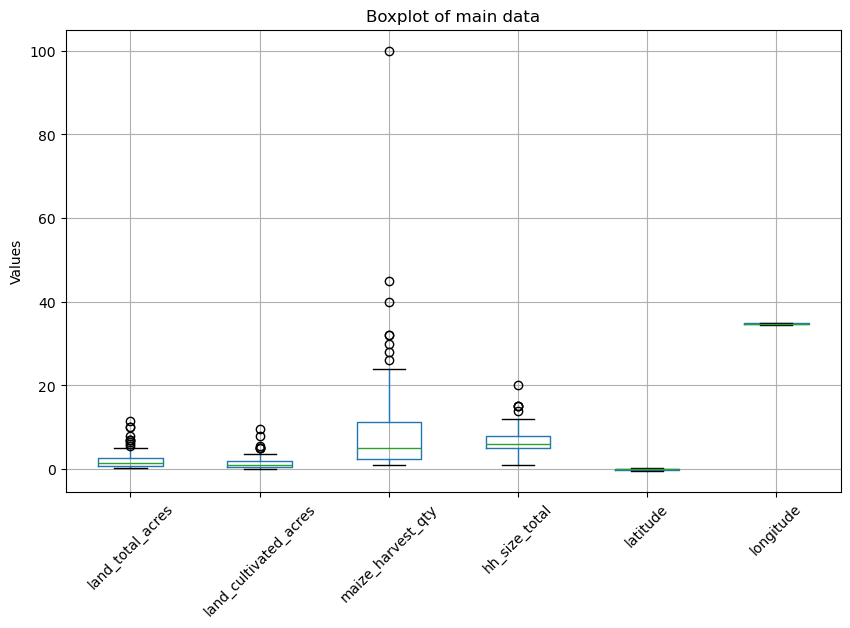

In [8]:
data_no_hhid = data.drop(columns='HHID')
# plot the numeric variables
plt.figure(figsize=(10, 6))
data_no_hhid.boxplot()
plt.title('Boxplot of main data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

The boxplot shows outliers in the variables land_total_acres,land_cultivated_acres, maize_harvest_qty, hh_size_total. The most concerning ones are the ones in the maize_harvest_qty variable, possible causes are larger farms, unusually good yields, or reporting/measurement errors.

Isolating the outliers allows us have a better overview of interaction of maize_harvest_qty with farm size and cultivated areas.

In [9]:
#zscore
outlier_df = pd.concat([data[(np.abs(stats.zscore(data[col].dropna())) > 3).reindex(data.index, fill_value=False)].assign(outlier_column=col) for col in data.select_dtypes(include=[np.number])])
outlier_df[outlier_df['outlier_column']== 'maize_harvest_qty']

HHID  land_total_acres  land_cultivated_acres  maize_harvest_qty  \
36   243              10.0                    3.0              100.0   

   maize_unit livestock_owned livestock_types usedOM climate_info_received  \
36  90 Kg bag              No             NaN     No                   Yes   

   hh_head_gender  hh_size_total     hh_head_education  latitude  longitude  \
36           Male             20  Undergraduate degree -0.089843  34.510215   

       outlier_column  
36  maize_harvest_qty

In [10]:
data[(data['maize_harvest_qty'] > 30) & (data['maize_unit'] == '90 Kg bag')]

HHID  land_total_acres  land_cultivated_acres  maize_harvest_qty  \
4    389              0.25                   0.25               32.0   
36   243             10.00                   3.00              100.0   
58   155              5.00                   3.50               40.0   

   maize_unit livestock_owned    livestock_types usedOM climate_info_received  \
4   90 Kg bag             Yes  Calves Dairy cows     No                   Yes   
36  90 Kg bag              No                NaN     No                   Yes   
58  90 Kg bag             Yes         Dairy cows    Yes                   Yes   

   hh_head_gender  hh_size_total     hh_head_education  latitude  longitude  
4            Male              5           Certificate  0.072590  34.685747  
36           Male             20  Undergraduate degree -0.089843  34.510215  
58           Male              1             Secondary  0.040091  34.644060

yields of 20 tons/acre are beyond a normal production for traditional smallholder maize farming, this value must be revised and cleaned.

Outliers in other variables are possible and might represent exeptional values rather than data errors.

## 3. Data cleaning and transformation

The first step in the data cleaning and transformation is to create a copy of the original dataset, to ensure the changes can be easlily reverted in case of issues. After that and follwing the insights from previous steps we will start by standarizing the string of column names

In [11]:
## string standardization
data_std = data.copy()
data_std.columns = data_std.columns.str.lower()
print(data_std.columns.tolist())

['hhid', 'land_total_acres', 'land_cultivated_acres', 'maize_harvest_qty', 'maize_unit', 'livestock_owned', 'livestock_types', 'usedom', 'climate_info_received', 'hh_head_gender', 'hh_size_total', 'hh_head_education', 'latitude', 'longitude']


The second step is to impute the median to the outliers in maize_harvest_qty. We choose this option to avoid loosing valuable data from other variables and to keep the metrics of the dataset unchanged.

In [12]:
data_std.loc[4, 'maize_harvest_qty'] = data_std['maize_harvest_qty'].median()
data_std.loc[36, 'maize_harvest_qty'] = data_std['maize_harvest_qty'].median()
data_std.loc[58, 'maize_harvest_qty'] = data_std['maize_harvest_qty'].median()

The following steps consists of assessing and cleaning the inconsistencies on the variable land_cultivated_acres

In [13]:
data_std[data_std['land_cultivated_acres']==0]

hhid  land_total_acres  land_cultivated_acres  maize_harvest_qty  \
10   354              1.50                    0.0                7.0   
14   332              0.50                    0.0               20.0   
22   294              0.25                    0.0                2.5   
25   275              0.75                    0.0                7.0   
38   241              3.00                    0.0               15.0   
64   131              0.25                    0.0                7.0   

             maize_unit livestock_owned        livestock_types usedom  \
10            90 Kg bag             Yes     Dairy cows Poultry    Yes   
14  Gorogoro (2 kg tin)             Yes                Poultry    Yes   
22            90 Kg bag             Yes             Dairy cows    Yes   
25            90 Kg bag             Yes  Goats Other (specify)    Yes   
38            90 Kg bag             Yes                Poultry     No   
64            90 Kg bag             Yes          Goats Poultry    Yes   

   climate_info_received hh_head_gender  hh_size_total     hh_head_education  \
10                   Yes           Male              7               Primary   
14                   Yes           Male              4  Undergraduate degree   
22                   Yes           Male              7             Secondary   
25                   Yes           Male             10             Secondary   
38                     N           Male              6               Diploma   
64                   Yes           Male              5               Diploma   

    latitude  longitude  
10  0.149884  34.684350  
14  0.080895  34.892021  
22 -0.198475  34.638684  
25 -0.172252  34.495840  
38 -0.214472  34.996833  
64 -0.039006  34.606576

As this seems to be an error in the data, I opt to fill the values where and_cultivated_acres = 0 that have reported harvesed maize. The filling option that used is to use the average fraction of total land that is reported to be cultivated. In a real professional scenario this would require coordination and discussion of data collection teams, and or colleagues that are familiar with the farms in the area.

In [14]:
# Calculate average cultivation ratio
avg_cultivation_ratio = (data_std['land_cultivated_acres'] / data_std['land_total_acres']).mean()

# Impute where cultivated area is 0
data_std.loc[data_std['land_cultivated_acres'] == 0, 'land_cultivated_acres'] = (
    data_std['land_total_acres'] * avg_cultivation_ratio
)
#verification
data_std.loc[14,]

hhid                                      332
land_total_acres                          0.5
land_cultivated_acres                0.346482
maize_harvest_qty                        20.0
maize_unit                Gorogoro (2 kg tin)
livestock_owned                           Yes
livestock_types                       Poultry
usedom                                    Yes
climate_info_received                     Yes
hh_head_gender                           Male
hh_size_total                               4
hh_head_education        Undergraduate degree
latitude                             0.080895
longitude                           34.892021
Name: 14, dtype: object

The next step is to standardize the maize units, create a conversion factor map for units, and finally calculate the standarized harvested quantities in Kilograms

In [15]:
# see unit values in the dataframe
print("Unique values in maize_unit column:")
print(data_std['maize_unit'].unique())

# Create a standardized version of the unit column for matching
data_std['orgfert_quantity_2024'] = (data_std['maize_unit']
                                .astype(str)
                                .str.lower()
                                .str.strip()
                                .str.replace(r'(\d)([a-zA-Z])', r'\1 \2', regex=True))

# preview cleaned values
print("\nCleaned unique values:")
print(data_std['orgfert_quantity_2024'].unique())

## Satandardization of units 
# Conversion factors based on the cleaned units
conversion_factors = {
    '90 kg bag': 90,
    'gorogoro (2 kg tin)': 2,
    'kilograms': 1,
    '50 kg bag': 50,
    '10 kg bag': 10
}

# Apply conversion using the cleaned column
data_std['maize_harvest_qty_kg'] = data_std['maize_harvest_qty'] * data_std['orgfert_quantity_2024'].map(conversion_factors)

# Check for any missing values (units not in our conversion map)
missing_mask = data_std['maize_harvest_qty_kg'].isna()
if missing_mask.any():
    print(f"\nWarning: {missing_mask.sum()} records had units not found in conversion map:")
    print(data_std[missing_mask]['orgfert_quantity_2024'].unique())
    
    # Fill missing values with original quantity (or you can choose another strategy)
    data_std.loc[missing_mask, 'maize_harvest_qty_kg'] = data_std.loc[missing_mask, 'maize_harvest_qty']

# Check the results
print("\nConversion results:")
print(data_std[['maize_harvest_qty', 'maize_unit', 'orgfert_quantity_2024', 'maize_harvest_qty_kg']].tail(10))

Unique values in maize_unit column:
['90 Kg bag' 'Gorogoro (2 kg tin)' 'Kilograms' '50Kg bag' '10Kg bag']

Cleaned unique values:
['90 kg bag' 'gorogoro (2 kg tin)' 'kilograms' '50 kg bag' '10 kg bag']

Conversion results:
    maize_harvest_qty maize_unit orgfert_quantity_2024  maize_harvest_qty_kg
90                6.0  90 Kg bag             90 kg bag                 540.0
91                3.0  90 Kg bag             90 kg bag                 270.0
92                5.0  90 Kg bag             90 kg bag                 450.0
93               15.0   50Kg bag             50 kg bag                 750.0
94                2.0  90 Kg bag             90 kg bag                 180.0
95                1.0  90 Kg bag             90 kg bag                  90.0
96                2.0   10Kg bag             10 kg bag                  20.0
97                2.0  90 Kg bag             90 kg bag                 180.0
98                2.0  90 Kg bag             90 kg bag                 180.0
99     

The next step is analizing the values in the climate_info_received column

In [16]:
print("Unique values in climate_info_received column:")
print(data_std['climate_info_received'].unique())

## climate info received standization
data_std['climate_info_received_std'] = data_std['climate_info_received'].astype(str).str.lower().str.strip()

# Create mapping dictionary
response_mapping = {
    'yes': 'Yes',
    'y': 'Yes',
    'no': 'No',
    'n': 'No',
    'noo': 'No',
    'nooo': 'No',
    'not': 'No',
    'mo': 'No'
}

# Apply mapping
data_std['climate_info_received_std'] = data_std['climate_info_received_std'].map(response_mapping)

# Fill any remaining values with their original (capitalized)
mask = data_std['climate_info_received_std'].isna()
data_std.loc[mask, 'climate_info_received_std'] = data_std.loc[mask, 'climate_info_received'].astype(str).str.title()

print("Standardization completed!")
print(data_std['climate_info_received_std'].value_counts())

Unique values in climate_info_received column:
['Yes' 'No' 'no' 'NO' 'N' 'NOO' 'NOOO' 'MO' 'not' 'n']
Standardization completed!
climate_info_received_std
Yes    68
No     32
Name: count, dtype: int64


Then we explore the nature of missing data on the livestock_types variable

In [17]:
# Print subset where livestock_types has missing values
print("Rows with missing livestock_types:")
data_std[data_std['livestock_types'].isna()].head(16)


Rows with missing livestock_types:


hhid  land_total_acres  land_cultivated_acres  maize_harvest_qty  \
20   303              1.00                   0.50                7.0   
34   246              2.00                   1.00                3.0   
36   243             10.00                   3.00                5.0   
46   188              3.00                   2.00                4.0   
57   156              0.25                   0.25                2.0   
72   103              5.00                   2.00               10.0   
75    95              1.00                   0.50                3.0   
81    77              0.25                   0.25                3.0   
85    56              1.00                   0.50                1.5   
90    36              3.00                   1.00                6.0   
91    30              1.50                   1.00                3.0   
92    29              1.25                   0.75                5.0   

   maize_unit livestock_owned livestock_types usedom climate_info_received  \
20  90 Kg bag              No             NaN     No                   Yes   
34  90 Kg bag              No             NaN    Yes                   Yes   
36  90 Kg bag              No             NaN     No                   Yes   
46  90 Kg bag              No             NaN     No                   Yes   
57  90 Kg bag              No             NaN    Yes                   Yes   
72  90 Kg bag              No             NaN     No                   Yes   
75  90 Kg bag              No             NaN    Yes                    No   
81  90 Kg bag              No             NaN     No                    No   
85   50Kg bag              No             NaN    Yes                    No   
90  90 Kg bag              No             NaN     No                   Yes   
91  90 Kg bag              No             NaN    Yes                   Yes   
92  90 Kg bag              No             NaN     No                   Yes   

   hh_head_gender  hh_size_total     hh_head_education  latitude  longitude  \
20         Female              3           Certificate  0.064953  34.615422   
34           Male              6             Secondary  0.090610  34.784143   
36           Male             20  Undergraduate degree -0.089843  34.510215   
46           Male              8           Certificate -0.088795  34.885205   
57         Female              7               Primary -0.100285  34.628695   
72           Male              3  Undergraduate degree -0.165333  34.511524   
75           Male              4             Secondary -0.063101  34.962314   
81         Female             10               Primary -0.177589  34.623066   
85           Male              4             Secondary -0.275602  34.828544   
90           Male             10           Certificate -0.006117  34.857462   
91           Male              4             Secondary -0.190888  34.628829   
92           Male              6             Secondary -0.252227  34.976858   

   orgfert_quantity_2024  maize_harvest_qty_kg climate_info_received_std  
20             90 kg bag                 630.0                       Yes  
34             90 kg bag                 270.0                       Yes  
36             90 kg bag                 450.0                       Yes  
46             90 kg bag                 360.0                       Yes  
57             90 kg bag                 180.0                       Yes  
72             90 kg bag                 900.0                       Yes  
75             90 kg bag                 270.0                        No  
81             90 kg bag                 270.0                        No  
85             50 kg bag                  75.0                        No  
90             90 kg bag                 540.0                       Yes  
91             90 kg bag                 270.0                       Yes  
92             90 kg bag                 450.0                       Yes

From the table we observe that NaN values refere to *not aplicable*, as none of the farms with missing livestock type records own livestock. We will fix this by using the string not_applicable instead of NaN, so these valuas are not treated a missing.

In [18]:
data_std['livestock_types'] = data_std['livestock_types'].fillna('Not_Applicable')
data_std[data_std['livestock_types'].isna()].head(16)


Empty DataFrame
Columns: [hhid, land_total_acres, land_cultivated_acres, maize_harvest_qty, maize_unit, livestock_owned, livestock_types, usedom, climate_info_received, hh_head_gender, hh_size_total, hh_head_education, latitude, longitude, orgfert_quantity_2024, maize_harvest_qty_kg, climate_info_received_std]
Index: []

Next we calculate the yield in Ton per Acre, assuming that the land_cultivated_acres reported are only of maize

In [19]:
data_std['maize_yield_ton_acre'] = ((data_std['maize_harvest_qty_kg']/1000)/data_std['land_cultivated_acres']).round(2)
data_std.head(10)

hhid  land_total_acres  land_cultivated_acres  maize_harvest_qty  \
0   409              2.50                   0.50                1.5   
1   398              2.00                   1.00               15.0   
2   397              1.50                   1.25                2.0   
3   395              3.00                   2.00               28.0   
4   389              0.25                   0.25                5.0   
5   382              1.50                   1.50                3.0   
6   370              1.00                   0.50                2.0   
7   369              1.00                   0.50                5.0   
8   361             10.00                   8.00                7.0   
9   358              7.00                   5.50               23.0   

  maize_unit livestock_owned                        livestock_types usedom  \
0  90 Kg bag             Yes         Dairy cows Goats Poultry Sheep    Yes   
1  90 Kg bag             Yes                       Dairy cows Goats    Yes   
2  90 Kg bag             Yes                                Poultry     No   
3  90 Kg bag             Yes                 Dairy cows Goats Sheep    Yes   
4  90 Kg bag             Yes                      Calves Dairy cows     No   
5  90 Kg bag             Yes                       Dairy cows Goats     No   
6  90 Kg bag             Yes  Dairy cows Trained oxen for ploughing    Yes   
7  90 Kg bag             Yes                                Poultry    Yes   
8  90 Kg bag             Yes                             Dairy cows     No   
9  90 Kg bag             Yes                       Dairy cows Goats    Yes   

  climate_info_received hh_head_gender  hh_size_total    hh_head_education  \
0                   Yes           Male             10              Primary   
1                   Yes           Male              8            Secondary   
2                   Yes           Male              3              Diploma   
3                   Yes           Male              5          Certificate   
4                   Yes           Male              5          Certificate   
5                    No           Male              4            Secondary   
6                   Yes           Male              6  Postgraduate degree   
7                   Yes           Male              6            Secondary   
8                   Yes           Male              7          Certificate   
9                   Yes           Male              9          Certificate   

   latitude  longitude orgfert_quantity_2024  maize_harvest_qty_kg  \
0 -0.152069  34.957133             90 kg bag                 135.0   
1 -0.065602  34.603184             90 kg bag                1350.0   
2 -0.262380  34.856136             90 kg bag                 180.0   
3  0.093717  34.577614             90 kg bag                2520.0   
4  0.072590  34.685747             90 kg bag                 450.0   
5  0.142677  34.825974             90 kg bag                 270.0   
6 -0.358320  34.708902             90 kg bag                 180.0   
7  0.062224  34.622627             90 kg bag                 450.0   
8 -0.267780  34.699328             90 kg bag                 630.0   
9 -0.203124  34.782004             90 kg bag                2070.0   

  climate_info_received_std  maize_yield_ton_acre  
0                       Yes                  0.27  
1                       Yes                  1.35  
2                       Yes                  0.14  
3                       Yes                  1.26  
4                       Yes                  1.80  
5                        No                  0.18  
6                       Yes                  0.36  
7                       Yes                  0.90  
8                       Yes                  0.08  
9                       Yes                  0.38

Finally we re-run the descriptive statistics on the cleaned and transformed dataset

In [20]:
# re-run the descriptive statistics for the main dataset cleaned and standarized
data_std_noid = data_std.drop(columns='hhid')
profile_data_std_noid = ProfileReport(data_std_noid, title="Main Data Profiling Report")
#profile_data.to_file("report.html")  # HTML report
profile_data_std_noid.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 44508.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The last step in the analisys is to save the cleaned manure data set as csv file

In [22]:
data_std.to_csv('../data/cleaned/main_std.csv', index=False)